<a href="https://colab.research.google.com/github/bhanu-nattala/Machine-Learning/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('creditcard.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(data.shape)

(284807, 31)


In [ ]:
data.isnull().values.any()

False

In [ ]:
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0]

In [ ]:
print(fraud.shape,valid.shape)

(492, 31) (284315, 31)


In [ ]:
# dividing the X and the Y from the dataset 
#X = data.drop(['Class'], axis = 1)
X = data[['Time','Amount']]
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values

(284807, 2)
(284807,)


In [ ]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 40)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest)

In [ ]:
from sklearn.metrics import accuracy_score  
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Render forest is {}".format(acc))

The accuracy of Render forest is 0.9980337769039008


In [ ]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(xTrain, yTrain)
yPred=gnb.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Naive Bayes is {}".format(acc))

The accuracy of Naive Bayes is 0.9982971103542713


In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(xTrain, yTrain)
yPred=dummy.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Dummy Classifier is {}".format(acc))

The accuracy of Dummy Classifier is 0.9966468873986166


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xTrain, yTrain)
yPred=svm.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of SVM is {}".format(acc))

The accuracy of SVM is 0.9982971103542713


In [ ]:
print(fraud.shape)

(492, 31)


In [ ]:
# Lets shuffle the data before creating the subsamples

data1 = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_data1 = data1.loc[data1['Class'] == 1]
non_fraud_data1 = data1.loc[data1['Class'] == 0][:492]

normal_distributed_data1 = pd.concat([fraud_data1, non_fraud_data1])

# Shuffle dataframe rows
new_data1 = normal_distributed_data1.sample(frac=1, random_state=42)

new_data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
184588,126301.0,-0.695209,0.370524,-0.088364,-1.093257,1.773392,-0.107895,1.450987,-0.718671,0.649021,1.148793,-0.001555,0.440511,0.729648,-0.734481,-0.883610,0.227202,-1.557084,-0.009163,0.750686,0.163932,-0.619943,-0.552759,0.239399,-1.379569,-0.172331,0.148458,0.019478,-0.589651,10.56,0
191267,129186.0,0.290155,0.049243,-0.740524,2.865463,1.395294,-0.535163,0.142543,-0.222770,-1.463691,1.713538,-1.127573,-0.708657,0.272186,0.274710,0.235192,-0.463553,0.472995,-0.447899,1.790924,0.247580,0.337349,1.018191,0.303550,0.833886,-1.222306,2.745261,-0.220402,0.168233,7.18,1
254539,156779.0,0.311782,0.661920,-0.103199,-0.712484,1.506534,-0.738647,1.874182,-1.015903,0.502722,0.134647,-0.921910,-0.186924,-0.257501,-0.379801,-0.605037,-0.982842,-0.603902,-0.545894,0.081064,-0.018290,-0.069576,0.357976,-0.308010,0.682468,0.077032,-0.434449,-0.768464,-0.666273,7.49,0
123201,76845.0,1.141572,1.291195,-1.432900,2.058202,0.940824,-0.958274,0.391154,-0.092519,-0.032829,-2.155303,1.080439,0.044415,0.441177,-5.053825,0.315185,0.821195,4.027366,1.077979,-1.107276,-0.005913,-0.366507,-0.714465,-0.143911,-0.305178,0.697514,-0.312545,0.106247,0.125060,1.00,1
58761,48533.0,1.243848,0.524526,-0.538884,1.209196,0.479538,-0.197429,0.049166,0.037792,0.128119,-0.552903,-0.668359,-0.818804,-0.883832,-0.994581,1.506849,0.624003,0.705794,0.524182,-0.731750,-0.171541,-0.051660,-0.084089,-0.192846,-0.917392,0.681953,-0.194419,0.045917,0.040136,1.00,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


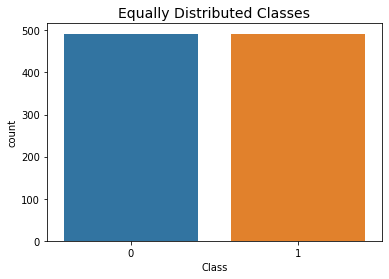

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_data1['Class'].value_counts()/len(new_data1))


import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot('Class', data=new_data1)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [ ]:
# dividing the X and the Y from the dataset 
#X = data.drop(['Class'], axis = 1)
X = new_data1[['Time','Amount']]
Y = new_data1["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values

(984, 2)
(984,)


In [ ]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 40)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest)

In [ ]:
from sklearn.metrics import accuracy_score  
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Render forest is {}".format(acc))

The accuracy of Render forest is 0.7360406091370558
